In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
b_dataframe = pd.read_csv("C:/Users/Christopher/Documents/reconv/Python/nyc-east-river-bicycle-counts.csv")

In [4]:
b_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 214 non-null    object 
 1   Day                  214 non-null    object 
 2   High Temp (°F)       214 non-null    float64
 3   Low Temp (°F)        214 non-null    float64
 4   Precipitation        214 non-null    object 
 5   Brooklyn Bridge      214 non-null    object 
 6   Manhattan Bridge     214 non-null    object 
 7   Williamsburg Bridge  214 non-null    object 
 8   Queensboro Bridge    214 non-null    object 
 9   Total                214 non-null    object 
dtypes: float64(2), object(8)
memory usage: 16.8+ KB


In [5]:
b_dataframe.sample(5)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
68,8-Jun,Wednesday,66.0,52.0,0.45,"2,630","5,266","6,325","4,094","18,315"
196,14-Oct,Friday,61.0,48.0,0,"2,925","5,477","6,604","4,015","19,021"
142,21-Aug,Sunday,84.9,75.0,0.31,"1,937","4,866","3,920","3,048","13,771"
173,21-Sep,Wednesday,84.0,69.1,0,"3,613","7,411","8,452","6,295","25,771"
165,13-Sep,Tuesday,82.0,64.9,0,"3,783","9,152","8,972","6,315","28,222"


In [6]:
# Converting the bicyle counts from Dtype object to int
b_dataframe.replace(",", "", regex=True, inplace=True)

In [7]:
counts_to_int = ["Brooklyn Bridge", "Manhattan Bridge", "Williamsburg Bridge", "Queensboro Bridge", "Total"]
b_dataframe[counts_to_int] = b_dataframe[counts_to_int].astype(int)

In [8]:
# Exploring why "Precipitation" has Dtype object
Precipitation_values = b_dataframe["Precipitation"].value_counts()
print(Precipitation_values)

Precipitation
0           128
T            18
0.01          8
0.09          5
0.04          4
0.16          3
0.22          3
0.2           2
0.45          2
0.25          2
0.15          2
0.56          2
0.4           2
0.05          2
0.32          1
1.08          1
0.06          1
0.11          1
0.03          1
0.68          1
0.82          1
0.31          1
1             1
0.23          1
0.55          1
1.11          1
0.29          1
1.09          1
0.83          1
0.35          1
0.62          1
0.53          1
0.08          1
0.66          1
0.49          1
0.12          1
0.91          1
1.65          1
0.18          1
0.02          1
0.54          1
0.61          1
0.24          1
0.47 (S)      1
1.41          1
Name: count, dtype: int64


In [9]:
# Precipitation = T, meaning trace, 18 times and 0.47 (S), for snow, once.
# Changing T to 0.001 and 0.47 (S) to 0.47 as to be able to convert "Precipitation" Dtype from object to float
b_dataframe["Precipitation"] = b_dataframe["Precipitation"].str.replace(r"\bT\b", "0.001",regex=True)
b_dataframe["Precipitation"] = b_dataframe["Precipitation"].str.replace("\(S\)", "", regex=True)

In [10]:
precipitation_to_float = ["Precipitation"]
b_dataframe[precipitation_to_float] = b_dataframe[precipitation_to_float].astype(float)

In [11]:
b_dataframe.dtypes

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation          float64
Brooklyn Bridge          int32
Manhattan Bridge         int32
Williamsburg Bridge      int32
Queensboro Bridge        int32
Total                    int32
dtype: object

In [16]:
# We are ready to graph!
sns.set(style="whitegrid")

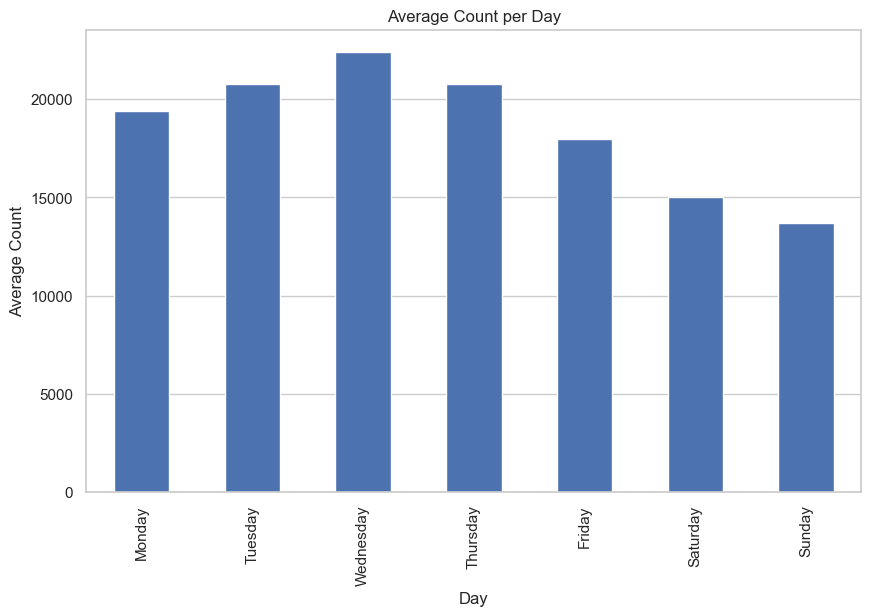

In [17]:
import matplotlib.pyplot as plt
# Ploting average count per day
average_count_per_day = b_dataframe.groupby("Day")["Total"].mean()
average_count_per_day = average_count_per_day.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(10, 6))
average_count_per_day.plot(kind="bar")
plt.xlabel("Day")
plt.ylabel("Average Count")
plt.title("Average Count per Day")
plt.grid(axis = "x")
plt.show()

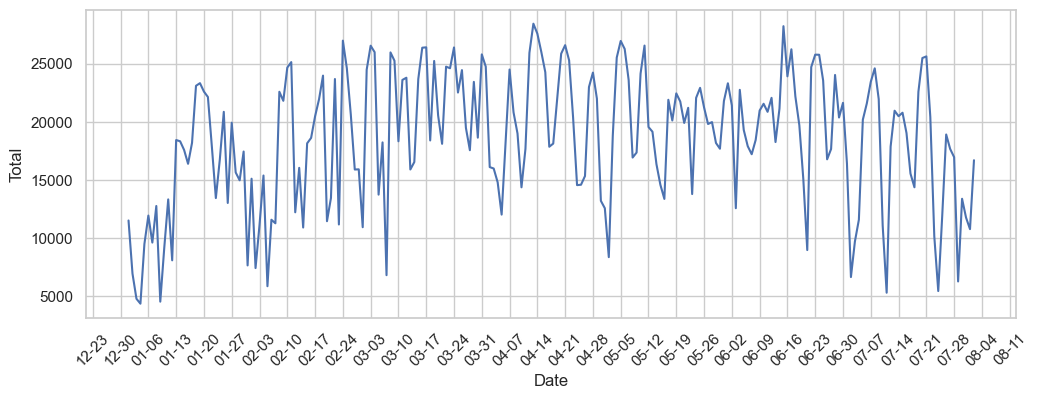

In [18]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 4))
ax = sns.lineplot(x="Date", y="Total", data=b_dataframe)
date_format = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Precipitation', ylabel='Total'>

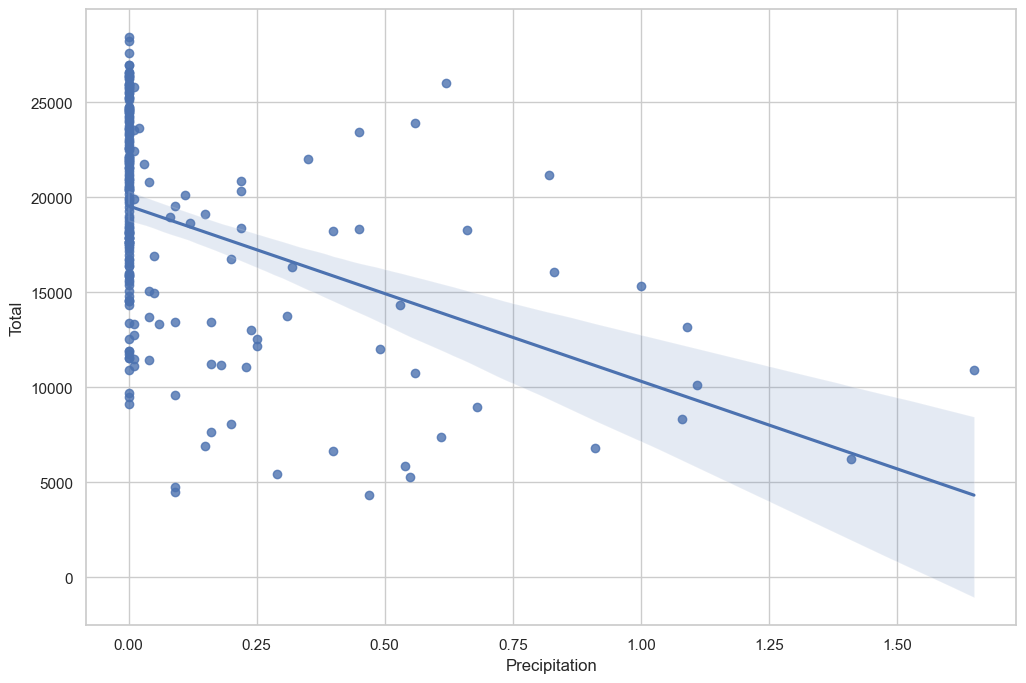

In [19]:
plt.figure(figsize=(12, 8))
sns.regplot(x= "Precipitation", y= "Total", data = b_dataframe)